<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase3_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teorema del Rango (Teorema de las Dimensiones)

Hemos concluido de la clase anterior  la siguiente afirmación

**Rango por columnas= rango por filas**

Este resultado es análogo al **Teorema de las Dimensiones**,
que dice que toda transformación lineal $A$ entre espacios de dimension finita satisface
$$
\mbox{dimension del dominio} =\mbox{dimensión del núcleo de }A+\mbox{dimension de la imagen de }A.
$$


 <details>
 <summary><b>
*$(\dagger)$ Por qué son análogos?*</b></summary>
Nuestra matriz $A$ de tamaño $m\times n$, se puede pensar como una transformación lineal
$$
A:\mathbb{R}^n\ \to \mathbb{R}^m.
$$
Observar que la matriz traspuesta $A^T$ satisface $$\langle Av,w\rangle =\langle v,A^Tw\rangle\qquad v\in\mathbb{R}^{n}, w\in\mathbb{R}^m.
$$
De esta igualdad resulta que el núcleo de $A^T$ es ortogonal a la imagen de $A$ (*verificar eso*).
Luego tenemos que el núcleo de $A$ y la imagen de $A^T$ dan una descomposición ortogonal del dominio $\mathbb{R}^n$. Es decir:
$$
n=\dim (\ker(A)) + \dim Im(A^T).
$$
Luego como el rango por filas es igual al rango por columnas resulta que $\dim Im(A^T)=\dim(Im(A))$. Lo cual implica el teorema de las dimensiones.
 </details>

---

# Aplicaciones de matrices por vectores.

Veamos algunos ejemplos sacados del libre Fessler y Nadakuditi.

# Integración Numérica
Supongamos que queremos aproximar el área debajo de una curva, i.e. calcular $\int_a^b f(x)\,dx$.

Considerando sumas de Riemann podemos aproximar dicha integral por:
$$
\int_a^b f(x)\,dx\approx \sum_{m=1}^M(x_{m}-x_{m-1})f(x_m)= \textbf{w}'\textbf{f},
$$
donde $ \textbf{w}$ son las diferencias, y $\textbf{f}$ los valores funcionales:
$$
\textbf{w}=\begin{pmatrix}
x_1-x_0\\\vdots\\x_M-x_{M-1}\end{pmatrix}
$$
$$
\textbf{f}=\begin{pmatrix}
f(x_1)\\\vdots\\f(x_M)\end{pmatrix}
$$
Veamos el ejemplo de la parábola:

In [24]:
#comencemos explicando el comando range:
x=range(0,1,5)
for c in x
println(c)
end

0.0
0.25
0.5
0.75
1.0


In [34]:
#y el comando diff
x=[0,1,3,5, 10,15]
diff(x)

5-element Vector{Int64}:
 1
 2
 2
 5
 5

In [36]:
f(x) = x^2 # parabola
x = range(0,3,2000) # sample points
w = diff(x) # "widths" of rectangles
Area = w' * f.(x[2:end])

9.00675450281419

**Ejemplo.** Consideremos el problema de calcular numéricamente el volumen bajo una función 2D $f(x,y)$:

$$
V = \int_a^b \int_c^d f(x,y) \, dy \, dx.
$$

También podemos usar productos matriz-vector para esta operación. Primero, aproximamos la integral:

$$
V = \int_a^b \int_c^d f(x,y) \, dy \, dx \approx S \triangleq \sum_{m=1}^{M} \sum_{n=1}^{N} (x_m - x_{m-1}) (y_n - y_{n-1}) f(x_m, y_n),
$$

donde $c = y_0 < y_1 < \dots < y_N = d$.
Definimos el vector $\mathbf{w} \in \mathbb{R}^{M}$ como en el ejemplo 1D anterior, y también $\mathbf{u} \in \mathbb{R}^{N}$ y $F \in \mathbb{R}^{M \times N}$ de la siguiente manera:

$$
\mathbf{w} = \begin{bmatrix} x_1 - x_0 \\ \vdots \\ x_M - x_{M-1} \end{bmatrix}, \quad
\mathbf{u} = \begin{bmatrix} y_1 - y_0 \\ \vdots \\ y_N - y_{N-1} \end{bmatrix}, \quad
F = \begin{bmatrix}
f(x_1, y_1) & \cdots & f(x_1, y_N) \\
\vdots & \ddots & \vdots \\
f(x_M, y_1) & \cdots & f(x_M, y_N)
\end{bmatrix}.
$$

Entonces, la doble suma anterior se expresa como el siguiente producto en forma matriz-vector:

$$
V \approx S = \mathbf{w}^T F \mathbf{u}.
$$

<details> <summary><b>Prueba</b></summary>

$$
\mathbf{w}^T F \mathbf{u} =
\begin{bmatrix} w_1 & \dots & w_M \end{bmatrix}
\begin{bmatrix}
f(x_1, y_1) & \cdots & f(x_1, y_N) \\
\vdots & \ddots & \vdots \\
f(x_M, y_1) & \cdots & f(x_M, y_N)
\end{bmatrix}
\begin{bmatrix} u_1 \\ \vdots \\ u_N \end{bmatrix}
$$

$$
=
\begin{bmatrix} w_1 & \dots & w_M \end{bmatrix}
\begin{bmatrix}
\sum_{n=1}^{N} u_n f(x_1, y_n) \\
\vdots \\
\sum_{n=1}^{N} u_n f(x_M, y_n)
\end{bmatrix}
$$


In [38]:
f(x,y) = exp(-(x^2 + 3*y^2)) # gaussian bump function
x = range(0,3,2000) # sample points
y = range(0,2,1000) # sample points
w = diff(x) # "widths" of rectangles in x
u = diff(y) # "widths" of rectangles in y
F = f.(x[2:end], y[2:end]') # automatic broadcasting again!
S = w' * F * u # summation approximation to volume

0.4521691575122915

## Visualizando densidad gaussiana
Supongamos que queremos visualizar la densidad gaussiana en $\mathbb{R}^2$
$$
f(x,y)=e^{-x^2-3
0y^2},\quad x,y\in\mathbb{R}.
$$

Una primera aproximación es considerar un grilla de puntos (donde queremos visualizarla), para luego evaluar la exponencial en cada punto. Veamos un ejemplo.

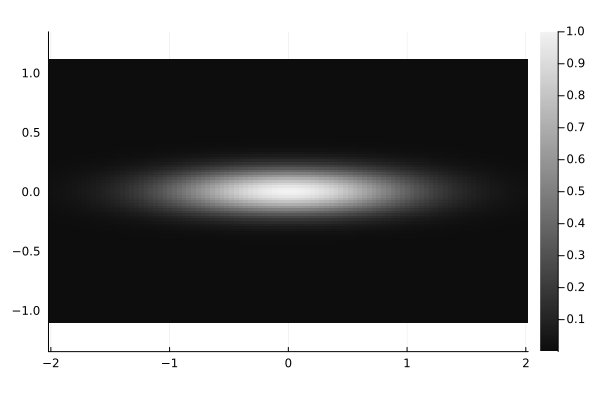

In [26]:
using Plots
M, N = 101, 103
x = range(-2, 2, M)
y = range(-1.1, 1.1, N)
F = zeros(M,N)
for m in 1:M, n in 1:N # nested loop
F[m,n] = exp(-(x[m]^2 + 30 * y[n]^2))
end
heatmap(x, y, F', color=:grays, aspect_ratio=:equal)

Otra posibilidad, un poco más concisa, es describir una matriz $A$ tal que $a_{i\,j}=x_i^2+10y_j^2$ y luego utilizar la exponencial (componente a componente) $F=exp.(-A)$.


En **JULIA**, `exp.(A)` aplica la exponenciación **elemento a elemento** a un arreglo.   

¿Cómo definimos $A$ donde $A_{ij} = x_i^2 + 30 y_j^2$ sin escribir un bucle doble?  
Una forma es usar **productos exteriores**. Si $u \in \mathbb{R}^M$ tiene elementos $u_i = x_i^2$ y $v \in \mathbb{R}^N$ tiene elementos $v_j = y_j^2$, entonces la siguiente **suma de productos exteriores** produce una matriz $M \times N$:

$ A = u \mathbf{1}_N^T + 30 \mathbf{1}_M v^T $

$ A =
\begin{bmatrix} x_1^2 \\ x_2^2 \\ \vdots \\ x_M^2 \end{bmatrix}
\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix}
+ 30
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\begin{bmatrix} y_1^2 & y_2^2 & \cdots & y_N^2 \end{bmatrix} $

$ =
\begin{bmatrix}
x_1^2 & x_1^2 & \cdots & x_1^2 \\
x_2^2 & x_2^2 & \cdots & x_2^2 \\
\vdots & \vdots & \ddots & \vdots \\
x_M^2 & x_M^2 & \cdots & x_M^2
\end{bmatrix}
+
30
\begin{bmatrix}
y_1^2 & y_2^2 & \cdots & y_N^2 \\
y_1^2 & y_2^2 & \cdots & y_N^2 \\
\vdots & \vdots & \ddots & \vdots \\
y_1^2 & y_2^2 & \cdots & y_N^2
\end{bmatrix} $

donde $\mathbf{1}_N$ denota el vector de unos, es decir, `ones(N)` en **JULIA**.


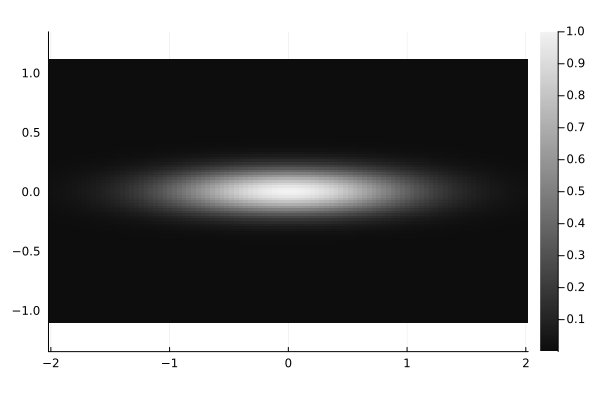

In [40]:
using Plots
M, N = 101, 103
x = range(-2, 2, M)
y = range(-1.1, 1.1, N)
A = (x.^2) * ones(N)' + 30 * ones(M) * (y.^2)'
F = exp.(-A)
heatmap(x, y, F', color=:grays, aspect_ratio=:equal)

# Multiplicación de Matrices AB

## Via Productos internos

Las **productos internos** (filas por columnas) producen cada uno de los números en \( AB = C \):

$$
\text{fila 2 de } A \quad \cdot \quad \text{columna 3 de } B \quad \Rightarrow \quad \text{da } c_{23} \text{ en } C
$$

$$
\begin{bmatrix}
a_{21} & a_{22} & a_{23}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{13} \\ b_{23} \\ b_{33}
\end{bmatrix}
=
c_{23}
$$

Ese producto puntual se calcula como:

$$
c_{23} = (\text{fila 2 de } A) \cdot (\text{columna 3 de } B) = \sum a's \cdot b's
$$

$$
c_{23} = a_{21} b_{13} + a_{22} b_{23} + a_{23} b_{33} = \sum a_{2k} b_{k3}, \quad \text{donde} \quad c_{ij} = \sum a_{ik} b_{kj}
$$

Este es el método usual para computar cada número en $AB = C$. Sin embargo, hay otro enfoque que nos será de mucha utilidad.

## Producto exterior

Otra forma de multiplicar matrices es como suma de productos exteriores de **columnas** de $A$ y **filas** de $B$. Para ver esto, comencemos con un caso muy especial e importante:
$$
 A=u \mbox{ matriz columna;}\qquad B=v^T \mbox{ vector fila}.
$$


### $uv^T$

Ejemplo:

$$
\begin{bmatrix} 2 \\ 1 \end{bmatrix}
\begin{bmatrix} 3 & 4 & 6 \end{bmatrix}
=
\begin{bmatrix} 6 & 8 & 12 \\ 3 & 4 & 6 \end{bmatrix}
$$

Este producto genera una matriz de rango uno. De manera general, un producto exterior $uv^T$ produce una matriz de rango uno, ya que todas sus columnas son múltiplos de $u$ y todas sus filas son múltiplos de $v^T$.

La dimensión del espacio generado por $uv^T$ es de una dimensión: **la línea en la dirección de $u$**. Así, toda matriz de rango uno tiene un espacio columna de dimensión uno.

<details>
<summary> **Cómo opera el producto exterior sobre vectores?**
</summary>

Observar que si pensamos $A=uv^T$ como transformación lineal, al operar sobre un vector arbitrario $x$ resulta
$$
Ax=(uv^T)x=u(v^Tx)= \langle v,x\rangle u.
$$
(donde hemos usado la propiedad distributiva de matrices.)

- Cuál es el núcleo del producto exterior $uv^T$>
- Cuál es su imagen?
- Qué tipo de operador lineal es $uu^T$ con $\|u\|=1$.

</details>

### Transposición y el producto exterior

$$
(uv^T)^T =
\begin{bmatrix} 6 & 8 & 12 \\ 3 & 4 & 6 \end{bmatrix}^T
=
\begin{bmatrix} 6 & 3 \\ 8 & 4 \\ 12 & 6 \end{bmatrix}
$$

Podemos escribir:

$$
(uv^T)^T = vu^T
$$




Una matriz no nula $uv^T$ tiene exactamente **una columna independiente y una fila independiente**. Todas sus columnas son múltiplos de $u$ y todas sus filas son múltiplos de $v^T$. El rango es $r = 1$ para esta matriz.

---

## $AB = $ Suma de Matrices de Rango Uno

Ahora consideramos el producto completo $AB$, usando columnas de $A$ multiplicadas por filas de $B$. Sean $a_1, a_2, \dots, a_n$ las columnas de $A$. Entonces, $B$ debe tener $n$ filas $b_1^*, b_2^*, \dots, b_n^*$. La matriz $A$ multiplica a la matriz $B$. Su producto $AB$ es la suma de **columnas de $A$ multiplicadas por filas de $B$**:

### Multiplicación Columna-fila

$$
AB =
\begin{bmatrix}
a_1 & a_2 & \dots & a_n
\end{bmatrix}
\begin{bmatrix}
b_1^* \\ b_2^* \\ \vdots \\ b_n^*
\end{bmatrix}
=
a_1 b_1^* + a_2 b_2^* + \dots + a_n b_n^*
$$

(suma de matrices de rango uno)

Un ejemplo con una matriz $2 \times 2$ para ilustrar la suma de $n = 2$ piezas:

$$
AB =
\begin{bmatrix} 1 &0 \\ 3&1 \end{bmatrix}
\begin{bmatrix} 2 &4 \\ 0&5 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 3 \end{bmatrix}
\begin{bmatrix} 2 & 4 \end{bmatrix}
+
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\begin{bmatrix} 0 & 5 \end{bmatrix}
=
\begin{bmatrix} 2 & 4 \\ 6 & 12 \end{bmatrix}
+
\begin{bmatrix} 0 & 0 \\ 0 & 5 \end{bmatrix}
=
\begin{bmatrix} 2 & 4 \\ 6 & 17 \end{bmatrix}
$$

---

Podemos contar las multiplicaciones de números en los productos. Cuatro multiplicaciones para obtener $2, 4, 6, 12$. Otras cuatro para obtener $0, 0, 0, 5$.  
El total de $2 \times 2 = 8$ multiplicaciones.  
Siempre hay $m \times n \times p$ multiplicaciones cuando $A$ es $m \times n$ y $B$ es $n \times p$.  
La multiplicación de matrices se puede ver como la suma de $n$ matrices de **rango uno**, cada una de ellas de tamaño $m \times p$.

El conteo es el mismo para el método de productos internos usual. La fila $i$ de $A$ con la columna $j$ de $B$ da $mp$ productos internos. Hacer esto para cada una de las $n$ columnas de $A$ es nuevamente **$mnp$**.  
La cuenta total es otra vez **$mnp$** cuando multiplicamos $(m \times n)$ por $(n \times p)$.

- Columnas $\times$ filas $\quad \Rightarrow \quad$ **inner products**, $mnp$
- Columnas $\times$ filas $\quad \Rightarrow \quad$ **outer products**, $mnp$
- Multiplicaciones de cada fila $\times$ cada columna $\quad \Rightarrow \quad$ **mnp**


Cuando observamos más de cerca, **vemos exactamente las mismas multiplicaciones $a_{ik} b_{kj}$ en diferentes órdenes**.

<details><summary>*Prueba algebraica*</summary>Aquí está la prueba algebraica de que cada número $c_{ij}$ en $C = AB$ es la misma suma de productos exteriores en $(3)$ y productos internos en $(2)$:

El $(i, j)$-ésimo término de $AB$, es:

$$
c_{ij} = a_{i1} b_{1j} + a_{i2} b_{2j} + \dots + a_{in} b_{nj} = \sum a_{ik} b_{kj}
$$

(fila $i$ $\cdot$ columna $j$)

</details>

# Columnas por filas: un pantallazo del álgebra lineal?

¿Por qué el enfoque del producto exterior es esencial en ciencia de datos?  
La respuesta corta es: **estamos buscando las partes o piezas más importante de una matriz**.  

No siempre necesitamos todas las entradas de una matriz $A$, pero sí nos interesa su mayor parte en términos de información. **Esos elementos clave son las matrices de rango uno $uv^T$**. Un tema dominante en álgebra lineal aplicada es:

**Factoriza $A$ en $CR$ y observa las piezas $c_k r_k^T$ en $A = CR$.**

Factorizar $A$ en $CR$ es lo opuesto a multiplicar $CR = A$. Factorizar suele ser más largo, especialmente si el objetivo involucra **autovalores** o **valores singulares**.  
Pero estas factorizaciones revelan información oculta sobre la matriz $A$, que **no es visible solo al multiplicar**.

A continuación, las factorizaciones más importantes con la elección estándar de centros (usualmente $A$) para la matriz original y las formas que toman sus factores:

$$
A = LU \quad A = QR \quad S = Q \Lambda Q^T \quad A = X \Lambda X^{-1} \quad A = U \Sigma V^T
$$

### Propiedades clave de estas factorizaciones:

1. **$A = LU$** proviene de la **eliminación**.  
   - Combinaciones de filas llevan $A$ a $L U$ y viceversa.  
   - $L$ es **triangular inferior** y $U$ es **triangular superior** en la ecuación (4).

2. **$A = QR$** proviene de **ortogonalizar** las columnas de $Q$, como en "Gram-Schmidt".  
   - $Q$ tiene **columnas ortogonales** ($Q^T Q = I$) y $R$ es **triangular superior**.

3. **$S = Q \Lambda Q^T$** proviene de los **autovalores $\lambda_1, \dots, \lambda_n$** de la **matriz simétrica** $S = S^T$.  
   - **Autovalores en la diagonal de $\Lambda$.**  
   - **Autovectores en las columnas de $Q$.**

4. **$A = X \Lambda X^{-1}$** es la **diagonalización** cuando $A$ tiene $n$ **autovectores independientes**.  
   - **Autovalores en la diagonal de $\Lambda$.**  
   - **Autovectores en las columnas de $X$.**

5. **$A = U \Sigma V^T$** es la **Singular Value Decomposition (SVD)** para cualquier matriz $A$ (cuadrada o no).  
   - **Valores singulares $\sigma_1, \dots, \sigma_r$ en $\Sigma$.**  
   - **Matriz ortogonal de valores singulares en $U$ y $V^T$.**

---

### Simetría y Matrices Ortogonales

Tomemos una matriz de tamaño **dos** para ilustrar la idea. La factorización especial $Q \Lambda Q^T$ inicia con una **matriz simétrica** $S$.  
Esa matriz tiene **autovalores reales** y **autovectores ortogonales** $q_1, q_2, \dots$.  
Esos autovectores diagonalizan $S$ y definen las **propiedades clave de matrices simétricas y ortogonales**:

#### Matriz Simétrica $S = S^T$

- Todos $a_{ij} = a_{ji}$

#### Matriz Ortogonal $Q$

- $Q^T Q = Q Q^T = I$
- Todas las $q_i$ son ortonormales:

$$
q_i \cdot q_j =
\begin{cases}
1, & \text{si } i = j \\
0, & \text{si } i \neq j
\end{cases}
$$


# Eigenvector $q$ and Eigenvalue $\lambda$

La matriz diagonal $\Lambda$ contiene autovalores $\lambda_1, \lambda_2, \dots, \lambda_n$.  
Toda **matriz simétrica** $S$ tiene una **base ortonormal de autovectores** $q_1, q_2, \dots, q_n$.  
Cuando multiplicamos $S$ por $q_i$, los autovectores permanecen en la misma dirección, solo escalados por $\lambda_i$:

$$
S q = \lambda q
$$

(5)

---

Encontrar $\lambda$ y $q$ **no es fácil** en matrices grandes.  
Pero los pares $(\lambda, q)$ **siempre existen** cuando $S$ es **simétrica**.  
Nuestra prueba aquí es ver cómo $SQ = Q \Lambda$ se obtiene únicamente con **multiplicación de matrices**:

$$
SQ =
S \begin{bmatrix} q_1 & q_2 & \dots & q_n \end{bmatrix}
=
\begin{bmatrix} S q_1 & S q_2 & \dots & S q_n \end{bmatrix}
=
\begin{bmatrix} \lambda_1 q_1 & \lambda_2 q_2 & \dots & \lambda_n q_n \end{bmatrix}
=
Q \Lambda.
$$

Multiplicando por $Q^{-1}$ a la derecha:

$$
SQ Q^{-1} = Q \Lambda Q^T
$$

Obtenemos **$S = Q \Lambda Q^T$**, una matriz **simétrica**.  

Cada autovalor $\lambda_i$ y su autovector $q_i$ contribuyen con una **matriz de rango uno**:

$$
\lambda_i q_i q_i^T.
$$

---

### Rank one pieces

$$
S = (Q \Lambda Q^T) = (\lambda_1 q_1 q_1^T + \lambda_2 q_2 q_2^T + \dots + \lambda_n q_n q_n^T).
$$

(Todas son **matrices simétricas**.)

La transposición de $q_i q_i^T$ es:

$$
q_i q_i^T = q_i q_i^T.
$$

(8)

---

**Observación:**  
Las columnas de $Q \Lambda$ son simplemente $\lambda_i q_i, \lambda_2 q_2, \dots$.  
Multiplicar una matriz a la **derecha** por $\Lambda$ **multiplica sus columnas por los autovalores $\lambda_i$**.

---

## Comentario sobre el **Teorema Espectral**

**Teorema Espectral**:  
$$
S = Q \Lambda Q^T.
$$
Toda **matriz simétrica** $S$ tiene **autovalores reales** y **autovectores ortonormales**.  

La sección 1.6 construirá los autovalores como las raíces del polinomio característico $\det(S - \lambda I)$.  
Son **números reales** porque **$S = S^T$**.  

Un detalle delicado en la prueba ocurre cuando **un autovalor es repetido**.  
Si $\lambda$ es una raíz doble de $\det(S - \lambda I)$,  
necesitamos encontrar **$M$ autovectores independientes** asociados a $\lambda$, donde $M$ es la **multiplicidad de $\lambda$** en $\det(S - \lambda I)$.

---

### Singular Value Decomposition

De manera similar, la **Descomposición en Valores Singulares (SVD)**

$$
A = U \Sigma V^T
$$

requiere un **par ortonormal** cuando un **valor singular** $\sigma$ se repite **$M$ veces en la matriz diagonal $\Sigma$**.  
En este caso, encontramos **$M$ autovectores ortogonales**.

---

### Notación de Filas y Transposición

La notación para las **filas de $B$** ha sido **$b_1^T, b_2^T, \dots$**, pero esta notación puede ser confusa.  
Podríamos haber esperado **$b_1, b_2$**, pero **eso fue un descuido**.  

Para evitar confusión, es mejor decir con precisión:

> **"Queremos las filas de esa matriz."**
